In [10]:
import numpy as np
import pandas as pd
import os, sys, cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,9]
from utils.data_utils import *

In [4]:
df_train = pd.read_csv('inputs/train_v2.csv')
print("Number of training images %d" % len(df_train))
df_train.head(3)

Number of training images 40479


,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary


In [6]:
df_test = pd.read_csv('inputs/sample_submission_v2.csv')
print("Number of test images %d" % len(df_test))
df_test.head(3)

Number of test images 61191


,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water


In [16]:
tags, _, _ = get_labels()
tags

['slash_burn',
 'clear',
 'blooming',
 'primary',
 'cloudy',
 'conventional_mine',
 'water',
 'haze',
 'cultivation',
 'partly_cloudy',
 'artisinal_mine',
 'habitation',
 'bare_ground',
 'blow_down',
 'agriculture',
 'road',
 'selective_logging']

In [14]:
from collections import Counter, defaultdict
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

labels = df_train['tags'].apply(lambda x: x.split(' '))
counts = defaultdict(int)
for l in labels:
    for l2 in l:
        counts[l2] += 1

tags = df_train['tags'].apply(lambda x: x.split(' '))
data=[go.Bar(x=list(counts.keys()), y=list(counts.values()))]
layout=dict(height=800, width=800, title='Distribution of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-label-dist')

In [15]:
# Co-occurence Matrix
com = np.zeros([len(counts)]*2)
for i, l in enumerate(list(counts.keys())):
    for i2, l2 in enumerate(list(counts.keys())):
        c = 0
        cy = 0
        for row in labels.values:
            if l in row:
                c += 1
                if l2 in row: cy += 1
        com[i, i2] = float(cy) / c

data=[go.Heatmap(z=com, x=list(counts.keys()), y=list(counts.keys()))]
layout=go.Layout(height=800, width=800, title='Co-occurence matrix of training labels')
fig=dict(data=data, layout=layout)
py.iplot(data, filename='train-com')

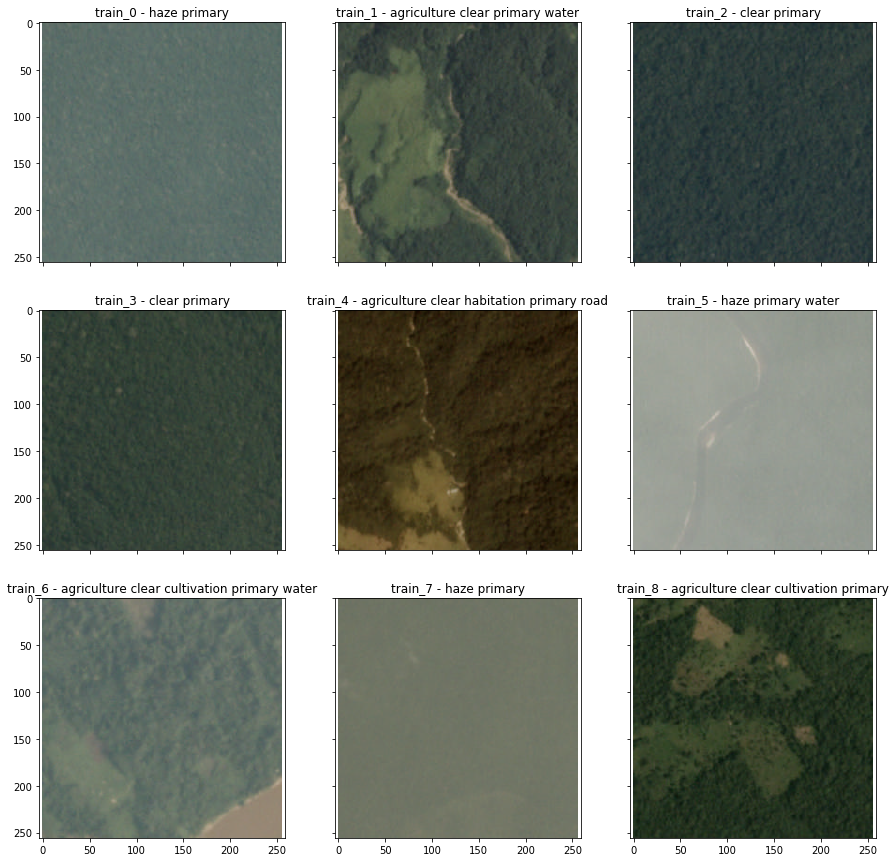

In [35]:
new_style = {'grid': False}
plt.rc('axes', **new_style)
_, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(15, 15))
i = 0
for f, l in df_train[:9].values:
    img = cv2.imread('inputs/train-jpg/{}.jpg'.format(f))
    ax[i // 3, i % 3].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[i // 3, i % 3].set_title('{} - {}'.format(f, l))

    i += 1
    
plt.show()